In [4]:
import pandas as pd

df = pd.read_csv("events.csv")
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


Test

In [5]:
df.isnull().sum()

id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2      726716
side                  0
event_team            0
opponent              0
player            61000
player2          649699
player_in        889294
player_out       889271
shot_place       713550
shot_outcome     712511
is_goal               0
location         473942
bodypart         711824
assist_method         0
situation        711872
fast_break            0
dtype: int64

In [7]:
df_clean = df.drop(columns=[
    'event_type2', 'player2', 'player_in', 'player_out',
    'shot_place', 'shot_outcome', 'bodypart', 'situation', 'location'
])

df_clean['player'] = df_clean['player'].fillna('Unknown')
df_clean.isnull().sum()



id_odsp          0
id_event         0
sort_order       0
time             0
text             0
event_type       0
side             0
event_team       0
opponent         0
player           0
is_goal          0
assist_method    0
fast_break       0
dtype: int64

In [8]:
df_clean.info()
df_clean.describe()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_odsp        941009 non-null  object
 1   id_event       941009 non-null  object
 2   sort_order     941009 non-null  int64 
 3   time           941009 non-null  int64 
 4   text           941009 non-null  object
 5   event_type     941009 non-null  int64 
 6   side           941009 non-null  int64 
 7   event_team     941009 non-null  object
 8   opponent       941009 non-null  object
 9   player         941009 non-null  object
 10  is_goal        941009 non-null  int64 
 11  assist_method  941009 non-null  int64 
 12  fast_break     941009 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 93.3+ MB


,id_odsp,id_event,sort_order,time,text,event_type,side,event_team,opponent,player,is_goal,assist_method,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,2,Hamburg SV,Borussia Dortmund,mladen petric,0,1,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,0,0,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,1,Borussia Dortmund,Hamburg SV,heiko westermann,0,0,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,1,Borussia Dortmund,Hamburg SV,sven bender,0,0,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,2,Hamburg SV,Borussia Dortmund,gokhan tore,0,0,0


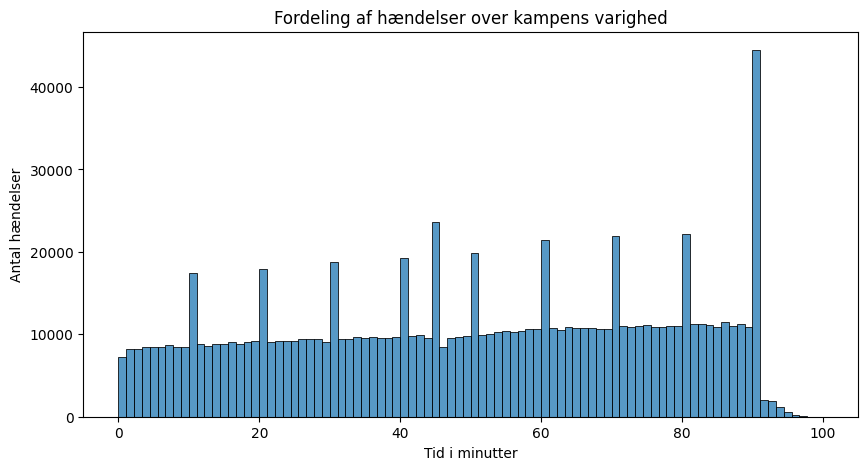

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df_clean['time'], bins=90)
plt.title("Fordeling af hændelser over kampens varighed")
plt.xlabel("Tid i minutter")
plt.ylabel("Antal hændelser")
plt.show()


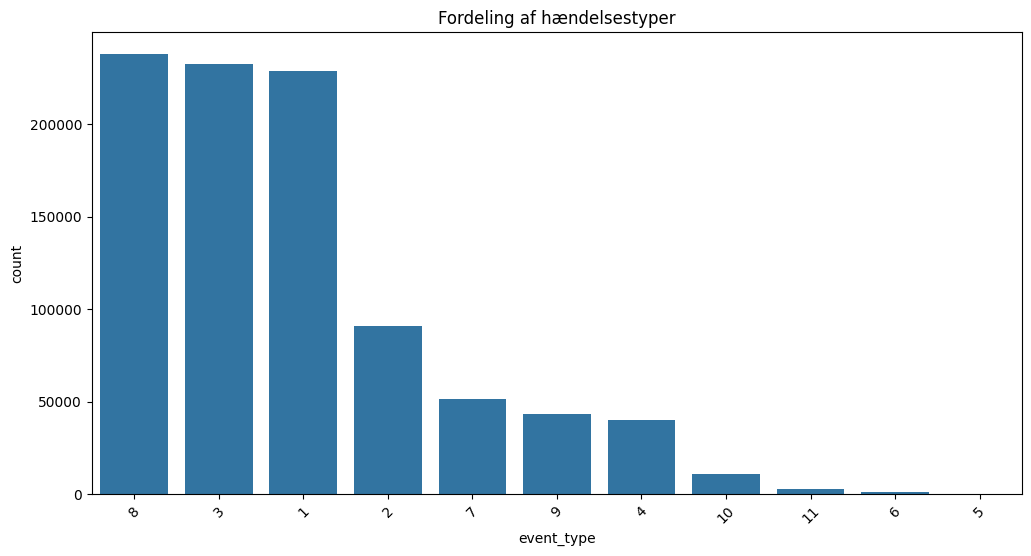

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='event_type', order=df_clean['event_type'].value_counts().index)
plt.title("Fordeling af hændelsestyper")
plt.xticks(rotation=45)
plt.show()


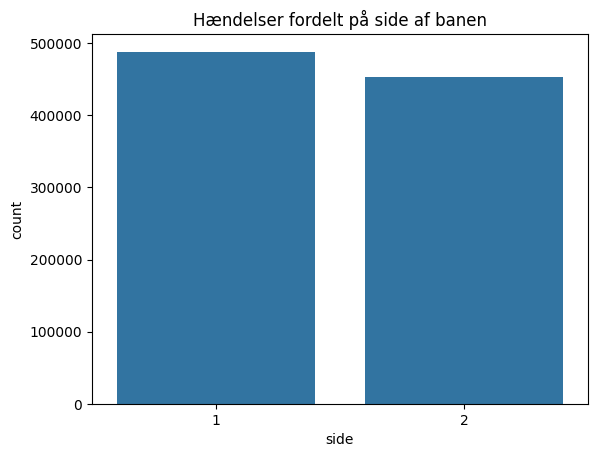

In [11]:
sns.countplot(data=df_clean, x='side')
plt.title("Hændelser fordelt på side af banen")
plt.show()
